<a href="https://colab.research.google.com/github/tharungajula2/Portfolio/blob/main/100_SALFORT_ALL_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
### YOUR CODE HERE ###
# For data manipulation
import numpy as np
import pandas as pd
# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
# For saving models
import pickle

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("/content/Salfort_HR_comma_sep.csv")
3
# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
'average_montly_hours': 'average_monthly_hours',
'time_spend_company': 'tenure',
'Department': 'department'})
# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
 # Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


## **LOGISTIC REGRESSION**



In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# One-hot encode the categorical variables as needed and save resulting␣
# dataframe in a new variable
df_enc = pd.get_dummies(df1, prefix=['salary', 'dept'], columns = ['salary','department'], drop_first=False)
# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


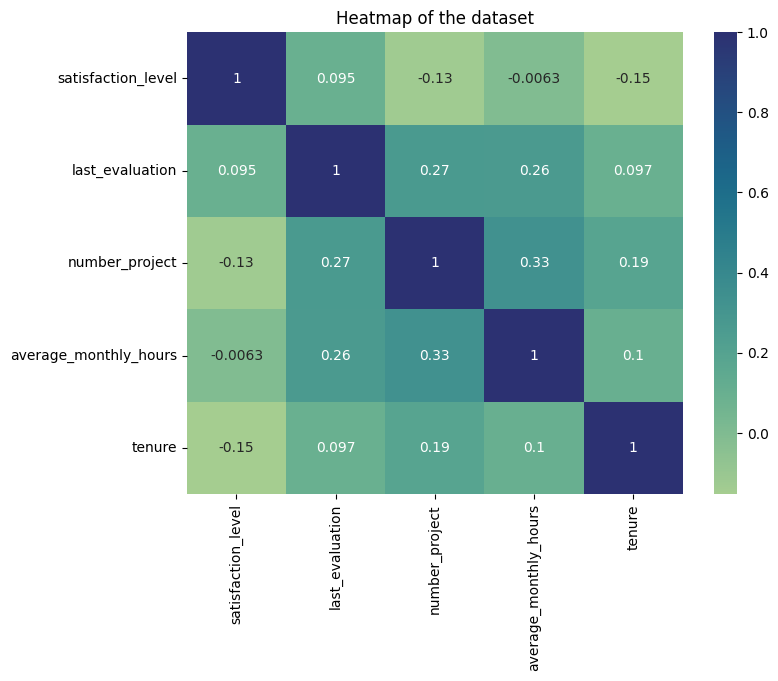

In [ ]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'tenure']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

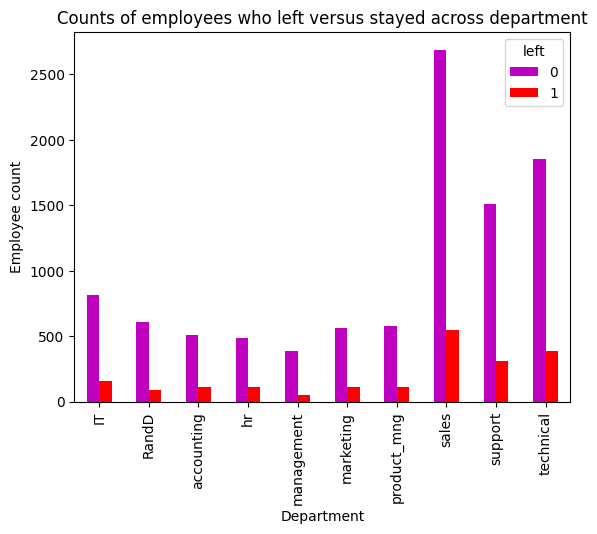

In [ ]:
# Create a stacked bart plot to visualize number of employees across␣ department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1, (red color) represents employees who left
pd.crosstab(df1["department"], df1["left"]).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [ ]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)
# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)
# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)
# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [ ]:
# Select rows without outliers in `tenure` and save resulting dataframe in a␣new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <=upper_limit)]
# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Isolate the outcome variable
y = df_logreg['left']
# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [ ]:
# Select the features you want to use in your model
X = df_logreg[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium' , 'dept_IT', 'dept_RandD','dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing','dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]
# Display the first few rows of the selected features
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construct the Logistic Regression Model

In [ ]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [ ]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model

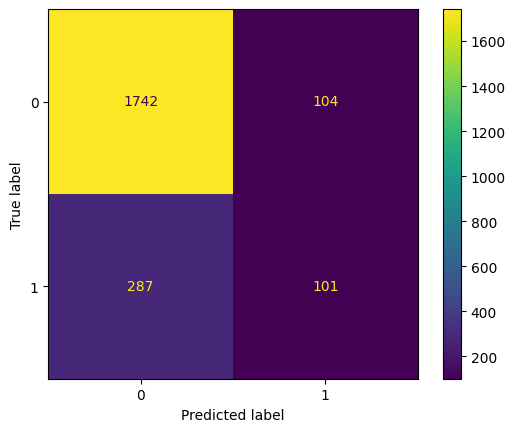

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
# Plot confusion matrix
log_disp.plot()
# Display plot
plt.show()

In [ ]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [ ]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.49      0.26      0.34       388

                 accuracy                           0.82      2234
                macro avg       0.68      0.60      0.62      2234
             weighted avg       0.80      0.82      0.80      2234



## **TREE BASED MODEL**

In [ ]:
# Encode categorical variables
df2 = pd.get_dummies(df1)

In [ ]:
# Isolate the outcome variable
y = df2['left']
# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
# Select the features
X = df2.drop('left', axis=1)
# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)
# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train, random_state=0)

Decision tree - Round 1 Construct a decision tree model and set up cross-validated grid-search
to exhuastively search for the best model parameters.

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
'min_samples_leaf': [2, 5, 1],
'min_samples_split': [2, 4, 6]
}
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree1.fit(X_tr, y_tr)

CPU times: user 5.09 s, sys: 0 ns, total: 5.09 s
Wall time: 6.86 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'recall', 'f1', 'precision'})

In [ ]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
# Check best AUC score on CV
tree1.best_score_

0.9703634179699269

writing a function that will help you extract all the scores from the grid search

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, accuracy, or auc
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    ,
    →
    '''
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
    'precision': 'mean_test_precision',
    'recall': 'mean_test_recall',
    'f1': 'mean_test_f1',
    'accuracy': 'mean_test_accuracy',
    }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
    'AUC': auc,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'Accuracy': accuracy,
    },
    ignore_index=True
    )
    return table

In [ ]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

<ipython-input-57-da7281950695>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
'max_features': [1.0],
'max_samples': [0.7, 1.0],
'min_samples_leaf': [1,2,3],
'min_samples_split': [2,3,4],
'n_estimators': [300, 500],
}
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_tr, y_tr) # --> Wall time: ~22min

CPU times: user 24min 22s, sys: 2.61 s, total: 24min 25s
Wall time: 24min 32s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'recall', 'f1', 'precision'})

In [ ]:
# Define a path to the folder where you want to save the model
path = '/content/Salfort Models'

In [ ]:
def write_pickle(path, model_object, save_as:str):
  '''
  In:
  path: path of folder where you want to save the pickle
  model_object: a model you want to pickle
  save_as: filename for how you want to save the model
  Out: A call to pickle the model in the folder indicated
  '''
  with open(path + save_as + '.pickle', 'wb') as to_write:
    pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name:str):
  '''
  In:
  path: path to folder where you want to read from
  saved_model_name: filename of pickled model you want to read in
  Out:
  model: the pickled model
  '''
  with open(path + saved_model_name + '.pickle', 'rb') as to_read:
    model = pickle.load(to_read)

  return model

In [ ]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [ ]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [ ]:
rf1.best_score_

0.9795790967836983

In [ ]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [ ]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.970363   0.922167  0.921337  0.921719  0.974007
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.979579   0.943576  0.923021  0.933145  0.978037


<ipython-input-57-da7281950695>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
  '''
  Generate a table of test scores.
  In:
  model_name (string): How you want your model to be named in the output␣
  ,
  →table
  model: A fit GridSearchCV object
  X_test_data: numpy array of X_test data
  y_test_data: numpy array of y_test data
  35
  Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your␣
  ,
  →model
  '''
  preds = model.best_estimator_.predict(X_test_data)
  auc = round(roc_auc_score(y_test_data, preds), 3)
  accuracy = round(accuracy_score(y_test_data, preds), 3)
  precision = round(precision_score(y_test_data, preds), 3)
  recall = round(recall_score(y_test_data, preds), 3)
  f1 = round(f1_score(y_test_data, preds), 3)
  table = pd.DataFrame({'model': [model_name],
  'AUC': [auc],
  'precision': [precision],
  'recall': [recall],
  'f1': [f1],
  'accuracy': [accuracy]
  })
  return table

In [ ]:
# Get the results on validation set for both models
tree1_val_results = get_scores('decision tree1 val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest1 val', rf1, X_val, y_val)
# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='AUC',ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.955,0.917,0.936,0.979
0,decision tree1 val,0.952,0.924,0.920,0.922,0.974


In [ ]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest1 test,0.955,0.961,0.917,0.938,0.98


## **Feature Engineering**

In [ ]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df3 = df1.drop('satisfaction_level', axis=1)
# Display first few rows of new dataframe
df3.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.53,2,157,3,0,1,0,sales,low
1,0.86,5,262,6,0,1,0,sales,medium
2,0.88,7,272,4,0,1,0,sales,medium
3,0.87,5,223,5,0,1,0,sales,low
4,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df3['overworked'] = df3['average_monthly_hours']
# Inspect max and min average monthly hours values
print('Max hours:', df3['overworked'].max())
print('Min hours:', df3['overworked'].min())

Max hours: 310
Min hours: 96


In [ ]:
# Define `overworked` as working > 175 hrs/week
df3['overworked'] = (df3['overworked'] > 175).astype(int)
# Display first few rows of new column
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [ ]:
# Drop the `average_monthly_hours` column
df3 = df3.drop('average_monthly_hours', axis=1)
# Display first few rows of resulting dataframe
df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.53,2,3,0,1,0,sales,low,0
1,0.86,5,6,0,1,0,sales,medium,1
2,0.88,7,4,0,1,0,sales,medium,1
3,0.87,5,5,0,1,0,sales,low,1
4,0.52,2,3,0,1,0,sales,low,0


In [ ]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df4 = pd.get_dummies(df3)
# Display the new dataframe
df4.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Isolate the outcome variable
y = df4['left']
# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
# Select the features
X = df4.drop('left', axis=1)
# Display the first few rows of `X`
X.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)
# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train, random_state=0)

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
'min_samples_leaf': [2, 5, 1],
'min_samples_split': [2, 4, 6]
}
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
tree2.fit(X_tr, y_tr)

CPU times: user 4.66 s, sys: 7.96 ms, total: 4.67 s
Wall time: 4.87 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'recall', 'f1', 'precision'})

In [ ]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [ ]:
# Check best AUC score on CV
tree2.best_score_

0.9534827790328492

In [ ]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
tree2_cv_results

<ipython-input-57-da7281950695>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree2 cv,0.953483,0.864826,0.902098,0.883024,0.960245


In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
'max_features': [1.0],
'max_samples': [0.7, 1.0],
'min_samples_leaf': [1,2,3],
'min_samples_split': [2,3,4],
'n_estimators': [300, 500],
}
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
 %%time
rf2.fit(X_tr, y_tr) # --> Wall time: 17min 5s

CPU times: user 18min 37s, sys: 2.51 s, total: 18min 39s
Wall time: 18min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'recall', 'f1', 'precision'})

In [ ]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')


In [ ]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [ ]:
# Check best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# Check best AUC score on CV
rf2.best_score_

0.9656664586139387

In [ ]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree2 cv  0.953483   0.864826  0.902098  0.883024  0.960245
               Model       AUC  Precision    Recall        F1  Accuracy
0  random forest2 cv  0.965666   0.909473  0.879506  0.894049  0.965388


<ipython-input-57-da7281950695>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


In [ ]:
# Collect validation scores
tree2_val_results = get_scores('decision tree2 val', tree2, X_val, y_val)
rf2_val_results = get_scores('random forest2 val', rf2, X_val, y_val)
# Concatenate validation scores into table
all_val_results2 = [tree2_val_results, rf2_val_results]
all_val_results2 = pd.concat(all_val_results2).sort_values(by='AUC', ascending=False)
all_val_results2

,model,AUC,precision,recall,f1,accuracy
0,decision tree2 val,0.942,0.883,0.907,0.895,0.965
0,random forest2 val,0.933,0.905,0.884,0.895,0.965


In [ ]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest2 test,0.935,0.898,0.889,0.894,0.965


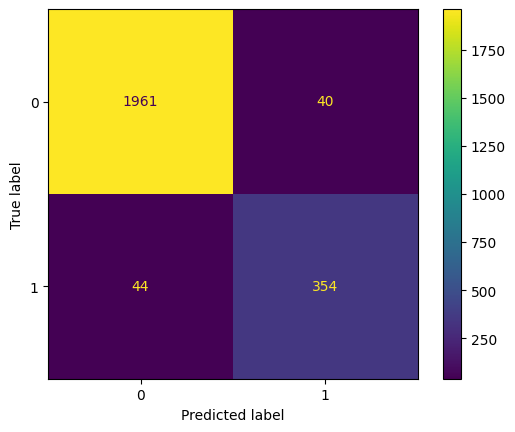

In [ ]:
 # Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=rf2.classes_)
disp.plot();